
units
=====
BHemissivity : 1e60 photons
BaryonFracModifier : None
BlackHoleAccretedColdMass : 1e10 solMass
BlackHoleAccretedHotMass : 1e10 solMass
BlackHoleMass : 1e10 solMass
CentralGal : None
ColdGas : 1e10 solMass
Cos_Inc : None
DiskScaleLength : Mpc
EffectiveBHM : 1e10 solMass
EjectedGas : 1e10 solMass
FOFMvir : 1e10 solMass
FOFMvirModifier : None
Fesc : None
FescBH : None
FescWeightedGSM : 1e10 solMass
GhostFlag : None
GrossStellarMass : 1e10 solMass
H2Frac : None
H2Mass : 1e10 solMass
HIMass : 1e10 solMass
HaloID : None
HotGas : 1e10 solMass
ID : None
Len : None
MWMSA : Myr
MaxLen : None
Mcool : 1e10 solMass
MergTime : Myr
MergerBurstMass : 1e10 solMass
MergerStartRadius : Mpc
MetalsColdGas : 1e10 solMass
MetalsEjectedGas : 1e10 solMass
MetalsHotGas : 1e10 solMass
MetalsStellarMass : 1e10 solMass
Mvir : 1e10 solMass
MvirCrit : 1e10 solMass
NewStars : 1e10 solMass
Pos : Mpc
Rcool : Mpc
Rvir : Mpc
Sfr : solMass/yr
Spin : None
StellarMass : 1e10 solMass
Type : None
Vel : km/s
Vmax 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: divide by zero encountered in log10


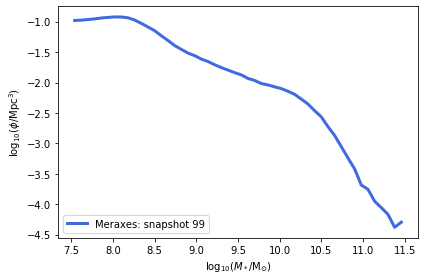

In [1]:
#!/usr/bin/env python

"""A simple example of plotting the stellar mass function (SMF) from Meraxes
output using single snapshot=100"""

# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library

# DRAGONS modules for reading and dealing with model ouput
from dragons import meraxes, munge

# First set the requested Hubble parameter value.
# By specifying h=0.7, we are ensuring that all of the galaxy properties
# are converted to a Hubble constant of H0=70 km/s/Mpc when they are read in.
#
# Note that if you want to set the hubble value to the actual value
# corresponding to the cosmology of the input N-body simulation then just pass `fname_in` to `set_little_h`
fname_in = "imapping_testrun/meraxes.hdf5"
meraxes.set_little_h(0.7)

# First read in all of the galaxies at snapshot 100 (z=5).  Note that you will
# of course need to update the paths to any files appropriately.
#
# By specifying `sim_props=True` when reading the galaxies, we are also
# returned a dictionary of properties for the Meraxes run we are reading.
gals, sim_props = meraxes.read_gals(fname_in, snapshot=250, sim_props=True)
#print('gals: ', gals)
#print('sim_props: ', sim_props)
# You can also see the units of all galaxy properties (and grids properties if
# they are present).  Here I am only printing the galaxy properties.
units = meraxes.read_units(fname_in)
print('\nunits\n=====')
for k, v in units.items():
    if not isinstance(v, dict):
        print(k, ':', v.decode('utf-8'))
print()

# The units of stellar masses ouput by the model are 1e10 Msol.  Let's convert
# this to log10(M/Msol).
gals["StellarMass"] = np.log10(gals["StellarMass"]*1e10)
print('gals: ', gals["StellarMass"])

# The `munge` module has a nice function that will calculate the mass function
# for us.  Take a look at the source code for this function if you are
# interested to see how it does this (recommended).
# mf = "mass function"
mf = munge.mass_function(gals["StellarMass"], sim_props["Volume"], bins=50,
                         range=(7.5, 11.5))
print('new mf array item: ', mf)
# Now let's plot the mass function...

# Create a new figure (with 1 column and 1 row) and axis
fig, ax = plt.subplots(1, 1)

# Plot the mass function
ax.plot(mf[:, 0], np.log10(mf[:, 1]), color="RoyalBlue", lw=3,
        label="Meraxes: snapshot 99")

# Set the axis labels.
# Note the use of LaTeX here.
ax.set_xlabel(r"$\log_{10}(M_* / {\rm M_{\odot}})$")
ax.set_ylabel(r"$\log_{10}(\phi / {\rm Mpc^3})$")

# Add the legend
ax.legend(loc="lower left")

# Finally save the figure as a PDF
plt.tight_layout()
plt.savefig("plots/smf.pdf")